In [1]:
# Install keras
!pip install keras

In [2]:
# Install Tensorflow
# Requires the latest pip
!pip install --upgrade pip

# Current stable release for CPU and GPU
!pip install tensorflow

# Or try the preview build (unstable)
!pip install tf-nightly

In [3]:
# Install pyTorch
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB 2.0 MB/s eta 0:19:44
     ---------------------------------------- 0.0/2.4 GB 825.8 kB/s eta 0:48:55
     ---------------------------------------- 0.0/2.4 GB 660.6 kB/s eta 1:01:09
     ---------------------------------------- 0.0/2.4 GB 655.4 kB/s eta 1:01:38
     ---------------------------------------- 0.0/2.4 GB 1.1 MB/s eta 0:36:24
     ---------------------------------------- 0.0/2.4 GB 1.5 MB/s eta 0:26:08
     ---------------------------------------- 0.0/2.4 GB 2.1 MB/s eta 0:19:12
     ---------------------------------------- 0.0/2.4 GB 2.6 MB/s eta 0:15:33
     ---------------------------------------- 0.0/2.4 GB 2.9 MB/s eta 0:14:07
     ---------------------------------------- 0.0/2.4 GB 2.9 MB/s eta 0:13:52
     ---------------------------------------- 0.0/2.4 GB 2.9 MB/s eta 0:13:52
     -

In [7]:
# Tỉ lệ pha train, test
train_ratio = 0.8
test_ratio = 1.0 - train_ratio

In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, GRU

In [4]:
# 2. Đọc file csv và gắng index với giá Close
btc = pd.read_csv('./Cryptocurrencies/BTC.csv')
eth = pd.read_csv('./Cryptocurrencies/ETH.csv')
doge = pd.read_csv('./Cryptocurrencies/DOGE.csv')

btc = btc.reset_index()['Close']
eth = eth.reset_index()['Close']
doge = doge.reset_index()['Close']

In [5]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))

btc = scaler.fit_transform(np.array(btc).reshape(-1, 1))
eth = scaler.fit_transform(np.array(eth).reshape(-1, 1))
doge = scaler.fit_transform(np.array(doge).reshape(-1, 1))

In [8]:
# 4. Chia train test
# BTC
btc_train_size = int(train_ratio * len(btc))
btc_test_size = int(test_ratio * len(btc))

btc_train_data = btc[:btc_train_size]
btc_test_data = btc[btc_train_size:btc_train_size+btc_test_size]

# ETH
eth_train_size = int(train_ratio * len(eth))
eth_test_size = int(test_ratio * len(eth))

eth_train_data = eth[:eth_train_size]
eth_test_data = eth[eth_train_size:eth_train_size+eth_test_size]

# DOGE
doge_train_size = int(train_ratio * len(doge))
doge_test_size = int(test_ratio * len(doge))

doge_train_data = doge[:doge_train_size]
doge_test_data = doge[doge_train_size:doge_train_size+doge_test_size]

In [9]:
# 5. Hàm Create Dataset
import numpy

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  # i=0, X=0,1,2,3-----99, Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [10]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100

# BTC
btc_x_train, btc_y_train = create_dataset(btc_train_data, time_step)
btc_x_test, btc_y_test = create_dataset(btc_test_data, time_step)

# ETH
eth_x_train, eth_y_train = create_dataset(eth_train_data, time_step)
eth_x_test, eth_y_test = create_dataset(eth_test_data, time_step)

# DOGE
doge_x_train, doge_y_train = create_dataset(doge_train_data, time_step)
doge_x_test, doge_y_test = create_dataset(doge_test_data, time_step)

In [11]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
# BTC
btc_x_train = btc_x_train.reshape(btc_x_train.shape[0], btc_x_train.shape[1], 1)
btc_x_test = btc_x_test.reshape(btc_x_test.shape[0], btc_x_test.shape[1], 1)

# ETH
eth_x_train = eth_x_train.reshape(eth_x_train.shape[0], eth_x_train.shape[1], 1)
eth_x_test = eth_x_test.reshape(eth_x_test.shape[0], eth_x_test.shape[1], 1)

# DOGE
doge_x_train = doge_x_train.reshape(doge_x_train.shape[0], doge_x_train.shape[1], 1)
doge_x_test = doge_x_test.reshape(doge_x_test.shape[0], doge_x_test.shape[1], 1)

In [12]:
# 8. Define GRU Model
# BTC
btc_model = Sequential()
btc_model.add(GRU(64, input_shape=(time_step, 1)))
btc_model.add(Dense(1))
btc_model.compile(optimizer='adam', loss='mean_squared_error')

# ETH
eth_model = Sequential()
eth_model.add(GRU(64, input_shape=(time_step, 1)))
eth_model.add(Dense(1))
eth_model.compile(optimizer='adam', loss='mean_squared_error')

# DOGE
doge_model = Sequential()
doge_model.add(GRU(64, input_shape=(time_step, 1)))
doge_model.add(Dense(1))
doge_model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\tue05\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# 9. Fit mô hình với dữ liệu train
btc_model.fit(btc_x_train, btc_y_train, validation_data=(
    btc_x_test, btc_y_test), epochs=100, batch_size=64, verbose=1)
eth_model.fit(eth_x_train, eth_y_train, validation_data=(
    eth_x_test, eth_y_test), epochs=100, batch_size=64, verbose=1)
doge_model.fit(doge_x_train, doge_y_train, validation_data=(
    doge_x_test, doge_y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0928 - val_loss: 0.0064
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0095 - val_loss: 0.0012
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 8.0874e-04 - val_loss: 8.2011e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 6.0245e-04 - val_loss: 9.0235e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 6.2867e-04 - val_loss: 7.5053e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.8430e-04 - val_loss: 6.9234e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.2104e-04 - val_loss: 7.4036e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 5.2013e-04 - val_loss: 6.4762e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.4459e-04 - val_loss: 6.8975e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 4.9423e-04 - val_loss:

In [14]:
# 10. Dự báo dữ liệu test, val
# BTC
btc_train_predict = btc_model.predict(btc_x_train)
btc_y_pred = btc_model.predict(btc_x_test)

# ETH
eth_train_predict = eth_model.predict(eth_x_train)
eth_y_pred = eth_model.predict(eth_x_test)

# DOGE
doge_train_predict = doge_model.predict(doge_x_train)
doge_y_pred = doge_model.predict(doge_x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [15]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
# BTC
btc_train_predict = scaler.inverse_transform(btc_train_predict)
btc_y_pred = scaler.inverse_transform(btc_y_pred)

# ETH
eth_train_predict = scaler.inverse_transform(eth_train_predict)
eth_y_pred = scaler.inverse_transform(eth_y_pred)

# DOGE
doge_train_predict = scaler.inverse_transform(doge_train_predict)
doge_y_pred = scaler.inverse_transform(doge_y_pred)

In [16]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
df_list = ['btc', 'eth', 'doge']


def mean_absolute_scaled_error(y_test, y_pred):
    # Calculate the mean absolute error of the predictions
    mae_pred = np.mean(np.abs(y_test - y_pred))
    
    # Calculate the mean absolute error of a naive forecast
    mae_naive = np.mean(np.abs(y_test[1:] - y_test[:-1]))
    
    # Calculate MASE
    mase = mae_pred / mae_naive
    
    return mase


for df in df_list:
    mase = mean_absolute_scaled_error(eval(f'{df}_y_test'), eval(f'{df}_y_pred'))
    mape = mean_absolute_percentage_error(eval(f'{df}_y_test'), eval(f'{df}_y_pred'))
    rmse = root_mean_squared_error(eval(f'{df}_y_test'), eval(f'{df}_y_pred'))

    print(df.upper())
    print('MAPE:', mape)
    print('MASE:', mase)
    print('RMSE:', rmse, '\n')

BTC Testing RMSE:  3265.499017021694
ETH Testing RMSE:  858.1591762776212
DOGE Testing RMSE:  2661.8613281280464


In [32]:
# 13. Dự báo 90 ngày tiếp theo
# BTC
from numpy import array
btc_x_input = btc_train_data.reshape(1, -1)
btc_x_input.shape

temp_input = list(btc_x_input)
temp_input = temp_input[0].tolist()

num_rows, num_cols = btc_train_data.shape
btc_lst_output = []
n_steps = num_rows - 1

i = 0
while (i < 90):

    if (len(temp_input) > 100):
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = btc_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        btc_lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = btc_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        btc_lst_output.extend(yhat.tolist())
        i = i+1

0 day input [0.00797186 0.00661429 0.00709948 ... 0.33582974 0.33578813 0.33746821]
0 day output [[0.33651912]]
1 day input [0.00661429 0.00709948 0.00693002 ... 0.33578813 0.33746821 0.33651912]
1 day output [[0.33640212]]
2 day input [0.00709948 0.00693002 0.01008479 ... 0.33746821 0.33651912 0.33640212]
2 day output [[0.33626476]]
3 day input [0.00693002 0.01008479 0.00938256 ... 0.33651912 0.33640212 0.33626476]
3 day output [[0.33615354]]
4 day input [0.01008479 0.00938256 0.00929692 ... 0.33640212 0.33626476 0.33615354]
4 day output [[0.33607042]]
5 day input [0.00938256 0.00929692 0.00931968 ... 0.33626476 0.33615354 0.33607042]
5 day output [[0.3360106]]
6 day input [0.00929692 0.00931968 0.00416424 ... 0.33615354 0.33607042 0.33601061]
6 day output [[0.33597094]]
7 day input [0.00931968 0.00416424 0.0042428  ... 0.33607042 0.33601061 0.33597094]
7 day output [[0.33594894]]
8 day input [0.00416424 0.0042428  0.004093   ... 0.33601061 0.33597094 0.33594894]
8 day output [[0.3359

In [33]:
# ETH
from numpy import array
eth_x_input = eth_train_data.reshape(1, -1)
eth_x_input.shape

temp_input = list(eth_x_input)
temp_input = temp_input[0].tolist()

num_rows, num_cols = eth_train_data.shape
eth_lst_output = []
n_steps = num_rows - 1

i = 0
while (i < 90):

    if (len(temp_input) > 100):
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = btc_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        eth_lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = btc_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        eth_lst_output.extend(yhat.tolist())
        i = i+1

0 day input [0.00133995 0.00125041 0.00120243 ... 0.10408191 0.10307221 0.10340299]
0 day output [[0.10129285]]
1 day input [0.00125041 0.00120243 0.00119645 ... 0.10307221 0.10340299 0.10129285]
1 day output [[0.10000439]]
2 day input [0.00120243 0.00119645 0.00120008 ... 0.10340299 0.10129285 0.10000439]
2 day output [[0.09861644]]
3 day input [0.00119645 0.00120008 0.00113966 ... 0.10129285 0.10000439 0.09861644]
3 day output [[0.09718637]]
4 day input [0.00120008 0.00113966 0.00110118 ... 0.10000439 0.09861644 0.09718637]
4 day output [[0.09572993]]
5 day input [0.00113966 0.00110118 0.0011229  ... 0.09861644 0.09718637 0.09572993]
5 day output [[0.09425175]]
6 day input [0.00110118 0.0011229  0.00095244 ... 0.09718637 0.09572993 0.09425175]
6 day output [[0.09275423]]
7 day input [0.0011229  0.00095244 0.00091748 ... 0.09572993 0.09425175 0.09275423]
7 day output [[0.09123895]]
8 day input [0.00095244 0.00091748 0.00095032 ... 0.09425175 0.09275423 0.09123895]
8 day output [[0.089

In [34]:
# DOGE
from numpy import array
doge_x_input = doge_train_data.reshape(1, -1)
doge_x_input.shape

temp_input = list(doge_x_input)
temp_input = temp_input[0].tolist()

num_rows, num_cols = doge_train_data.shape
doge_lst_output = []
n_steps = num_rows - 1

i = 0
while (i < 90):

    if (len(temp_input) > 100):
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = btc_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        doge_lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = btc_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        doge_lst_output.extend(yhat.tolist())
        i = i+1

0 day input [0.01100825 0.00964997 0.01094311 ... 0.36100131 0.35931477 0.36001318]
0 day output [[0.35961214]]
1 day input [0.00964997 0.01094311 0.01129931 ... 0.35931477 0.36001318 0.35961214]
1 day output [[0.35953104]]
2 day input [0.01094311 0.01129931 0.01140526 ... 0.36001318 0.35961214 0.35953104]
2 day output [[0.35947442]]
3 day input [0.01129931 0.01140526 0.01015695 ... 0.35961214 0.35953104 0.35947442]
3 day output [[0.35944676]]
4 day input [0.01140526 0.01015695 0.00983928 ... 0.35953104 0.35947442 0.35944676]
4 day output [[0.35944453]]
5 day input [0.01015695 0.00983928 0.00992121 ... 0.35947442 0.35944676 0.35944453]
5 day output [[0.35946327]]
6 day input [0.00983928 0.00992121 0.005243   ... 0.35944676 0.35944453 0.35946327]
6 day output [[0.35950023]]
7 day input [0.00992121 0.005243   0.00495315 ... 0.35944453 0.35946327 0.35950023]
7 day output [[0.35955307]]
8 day input [0.005243   0.00495315 0.00477032 ... 0.35946327 0.35950023 0.35955307]
8 day output [[0.359

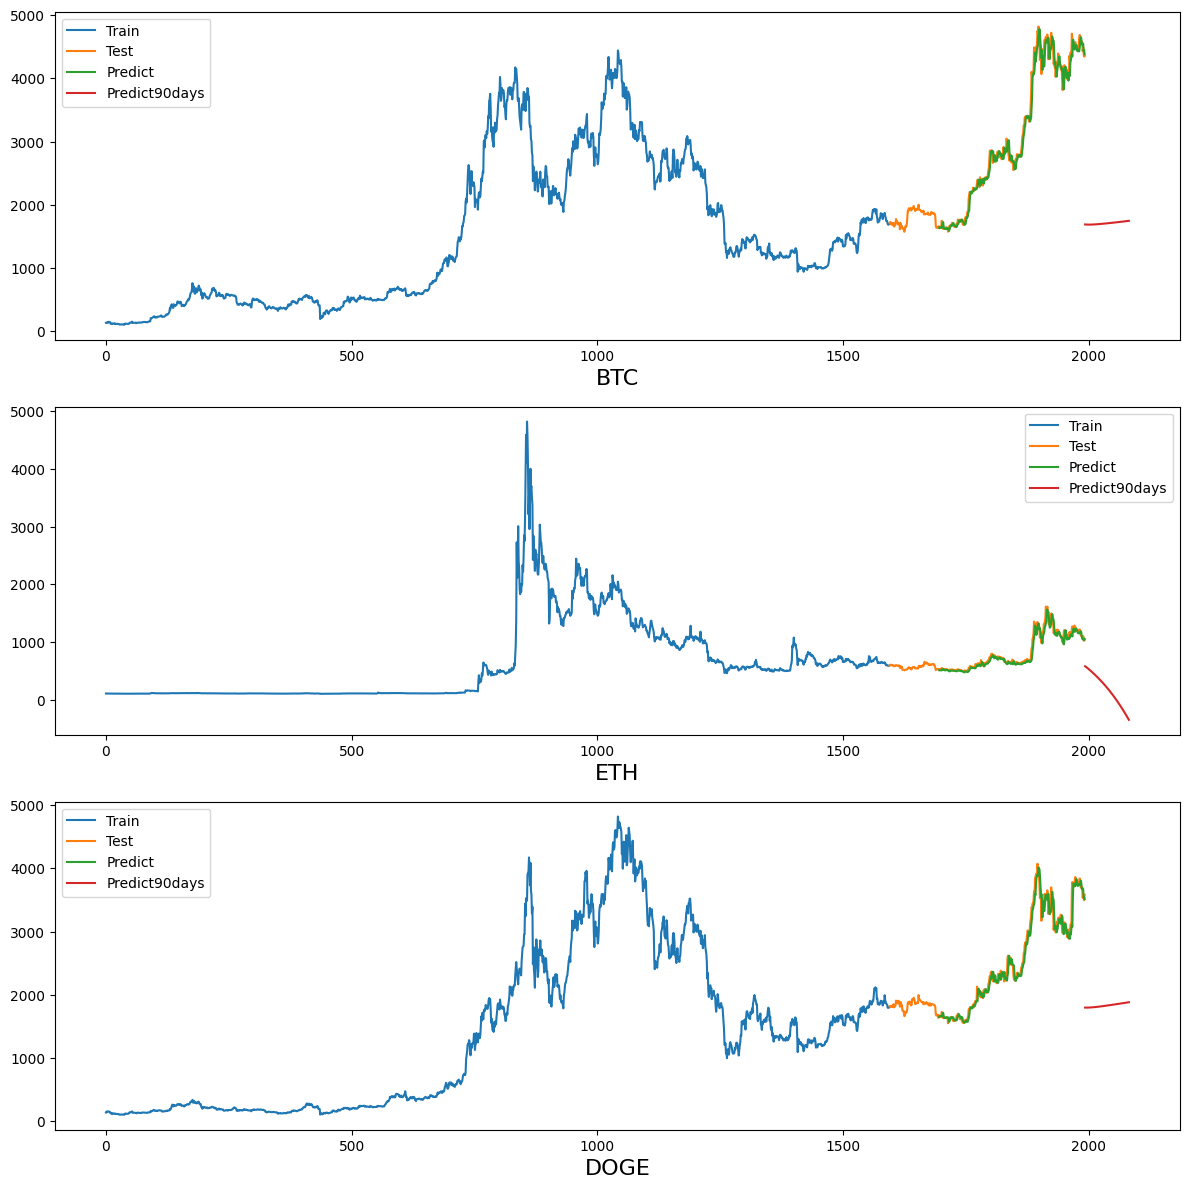

In [46]:
# 14.Vẽ hình
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# BTC
btc_train_data_index = pd.RangeIndex(start=0, stop=btc_train_size, step=1)
axs[0].plot(scaler.inverse_transform(btc_train_data))
btc_test_data_index = pd.RangeIndex(
    start=btc_train_size, stop=btc_train_size+btc_test_size, step=1)
axs[0].plot(btc_test_data_index, scaler.inverse_transform(btc_test_data))
btc_test_data_index = pd.RangeIndex(
    start=btc_train_size+101, stop=btc_train_size+btc_test_size, step=1)
axs[0].plot(btc_test_data_index, (btc_y_pred))
btc_predict_data_index = pd.RangeIndex(
    start=len(btc)-1, stop=len(btc)+89, step=1)
axs[0].plot(btc_predict_data_index, scaler.inverse_transform(btc_lst_output))
axs[0].legend(['Train', 'Test', 'Predict', 'Predict90days'])

# ETH
eth_train_data_index = pd.RangeIndex(start=0, stop=eth_train_size, step=1)
axs[1].plot(scaler.inverse_transform(eth_train_data))
eth_test_data_index = pd.RangeIndex(
    start=eth_train_size, stop=eth_train_size+eth_test_size, step=1)
axs[1].plot(eth_test_data_index, scaler.inverse_transform(eth_test_data))
eth_test_data_index = pd.RangeIndex(
    start=eth_train_size+101, stop=eth_train_size+eth_test_size, step=1)
axs[1].plot(eth_test_data_index, (eth_y_pred))
eth_predict_data_index = pd.RangeIndex(
    start=len(eth)-1, stop=len(eth)+89, step=1)
axs[1].plot(eth_predict_data_index, scaler.inverse_transform(eth_lst_output))
axs[1].legend(['Train', 'Test', 'Predict', 'Predict90days'])

# DOGE
doge_train_data_index = pd.RangeIndex(start=0, stop=doge_train_size, step=1)
axs[2].plot(scaler.inverse_transform(doge_train_data))
doge_test_data_index = pd.RangeIndex(
    start=doge_train_size, stop=doge_train_size+doge_test_size, step=1)
axs[2].plot(doge_test_data_index, scaler.inverse_transform(doge_test_data))
doge_test_data_index = pd.RangeIndex(
    start=doge_train_size+101, stop=doge_train_size+doge_test_size, step=1)
axs[2].plot(doge_test_data_index, (doge_y_pred))
doge_predict_data_index = pd.RangeIndex(
    start=len(doge)-1, stop=len(doge)+89, step=1)
axs[2].plot(doge_predict_data_index, scaler.inverse_transform(doge_lst_output))
axs[2].legend(['Train', 'Test', 'Predict', 'Predict90days'])

axs[0].set_xlabel('BTC', fontsize=16)
axs[1].set_xlabel('ETH', fontsize=16)
axs[2].set_xlabel('DOGE', fontsize=16)
plt.tight_layout()
plt.show()